<font size='6'><b>DeepLSS paper 1 figures </b></font>

In [29]:
path='/data/user/kacprz_t/projects/211027_combined_lss_ai/057_npix64_restart'

# init

In [30]:
import sys, os, h5py, bz2, pylab as plt, importlib, itertools
from tqdm import tqdm, trange
%pylab inline
%load_ext autoreload
%autoreload 2
if 'notebooks' in os.getcwd(): os.chdir('..')
print(os.getcwd())
d = 'repos/'; [sys.path.insert(0,os.path.join(d, o)) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))];
from collections import OrderedDict
from deep_lss.notebooks import utils_plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/tomaszk/Archive/projects/211027_combined_lss_ai/057_npix64_restart


/Users/tomaszk/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# general settings

In [262]:
host='merlin'
path_maps='/data/project/general/DeepLearningCP/data/data_products/projected_maps_stage3nonorm/maps/'
# results_prefix = 'snapshots/results_2203121700//stage3linear/'
results_prefix = 'snapshots/results_2203151400/stage3linear/'
# results_prefix_nonlin = 'snapshots//results_2203121700/stage3nonlin/'
results_prefix_nonlin = 'snapshots/results_2203151400/stage3nonlin/'
results_prefix_psdopt = 'results/opt2/'

# plot example maps

In [138]:
!rsync --progress -avR {host}:{path_maps}/./cosmo_0.291_0.783_0 .
    

/etc/profile.d/lang.sh: line 19: warning: setlocale: LC_CTYPE: cannot change locale (UTF-8): No such file or directory
receiving file list ... 
3 files to consider

sent 16 bytes  received 157 bytes  346.00 bytes/sec
total size is 983429144  speedup is 5684561.53


repos/deep_lss/deep_lss/notebooks/utils_plots.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{: 4.2f}".format(i) for i in cbar.get_ticks()]) # set ticks of your format


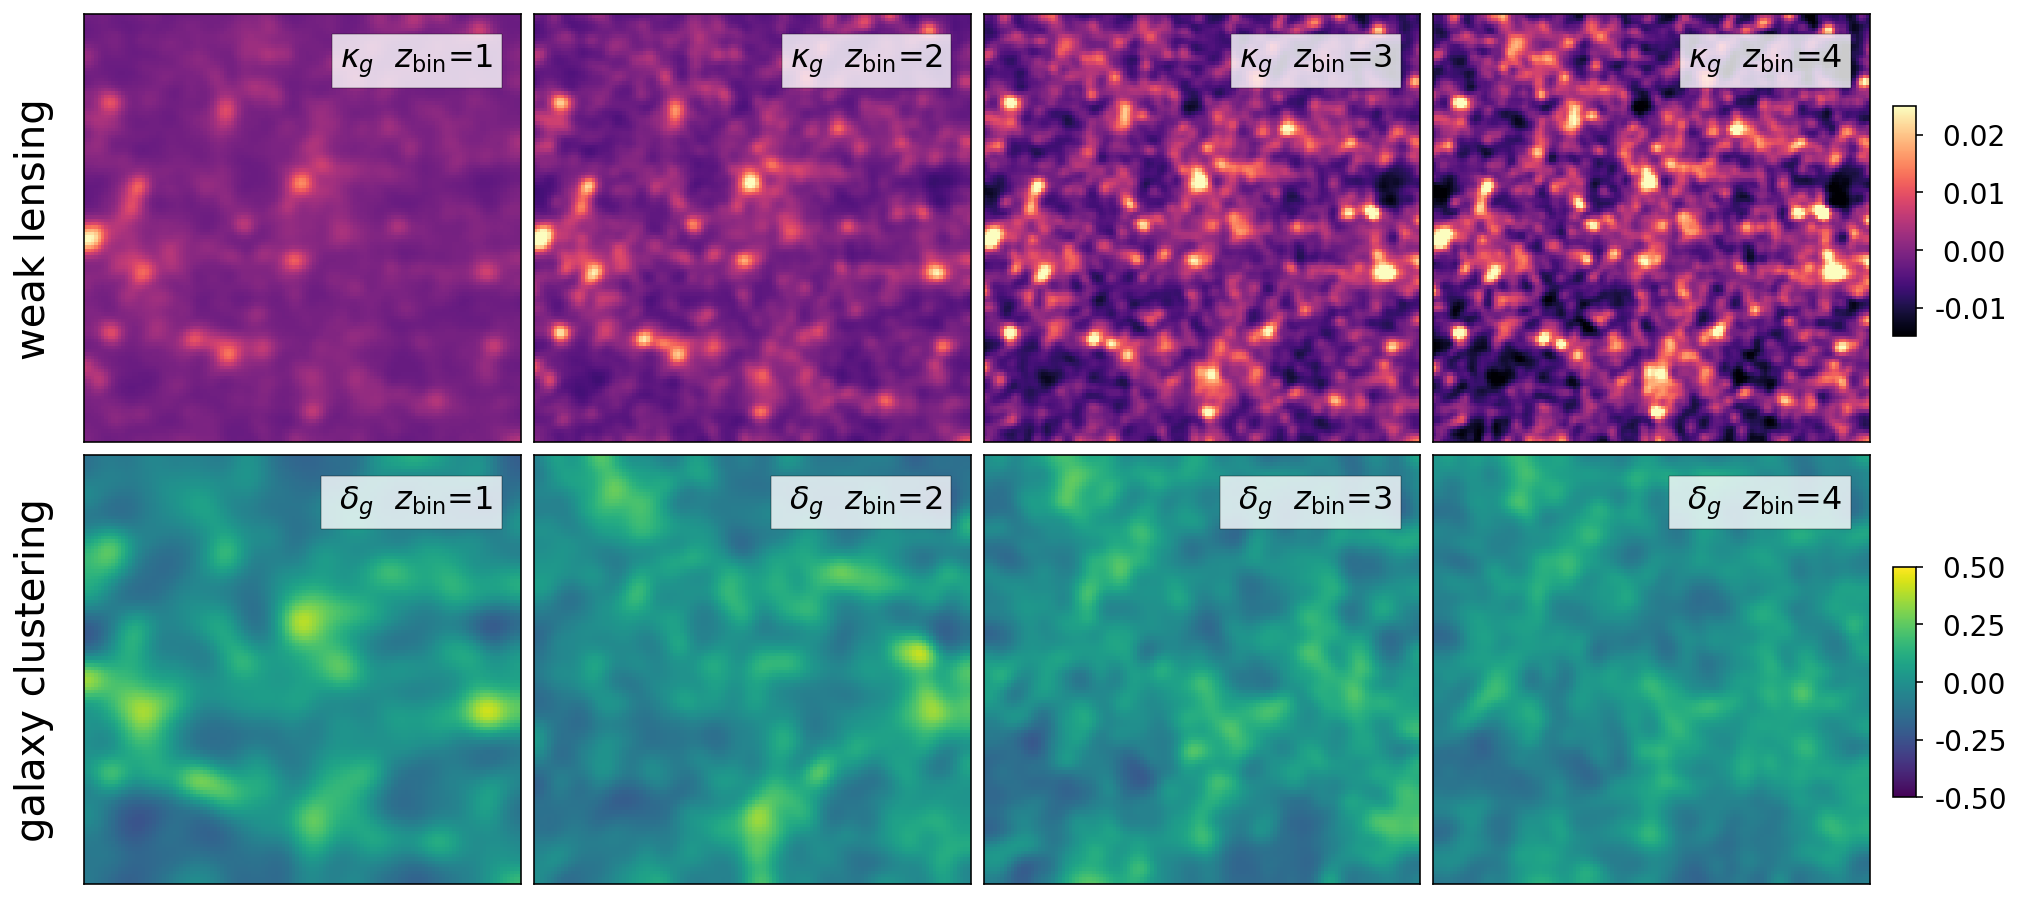

In [309]:
fig = utils_plots.plot_example_maps(path='cosmo_0.291_0.783_0/kappa_maps.h5', id_sample=12);
fig.savefig('notebooks/figure_maps.pdf', bbox_inches='tight')

# constraints

In [49]:
!rsync --progress -avR {host}:{path}/./results*/*/constraints/constraints_merged.h5 .
!rsync --progress -avR {host}:{path}/./results*/*/constraints/constraints_stats.pkl .

/etc/profile.d/lang.sh: line 19: warning: setlocale: LC_CTYPE: cannot change locale (UTF-8): No such file or directory
receiving file list ... 
rsync: link_stat "/data/user/kacprz_t/projects/211027_combined_lss_ai/057_npix64_restart/results*/*/constraints/constraints_merged.h5" failed: No such file or directory (2)
0 files to consider

sent 8 bytes  received 21 bytes  19.33 bytes/sec
total size is 0  speedup is 0.00
rsync error: some files could not be transferred (code 23) at /System/Volumes/Data/SWE/macOS/BuildRoots/e90674e518/Library/Caches/com.apple.xbs/Sources/rsync/rsync-55/rsync/main.c(1404) [receiver=2.6.9]
/etc/profile.d/lang.sh: line 19: warning: setlocale: LC_CTYPE: cannot change locale (UTF-8): No such file or directory
receiving file list ... 
rsync: link_stat "/data/user/kacprz_t/projects/211027_combined_lss_ai/057_npix64_restart/results*/*/constraints/constraints_stats.pkl" failed: No such file or directory (2)
0 files to consider

sent 8 bytes  received 21 bytes  19.33 

(1280000,)
psd 0.0028771176060451886


repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')


(1280000,)
cnn 0.00018241091450430587


repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')


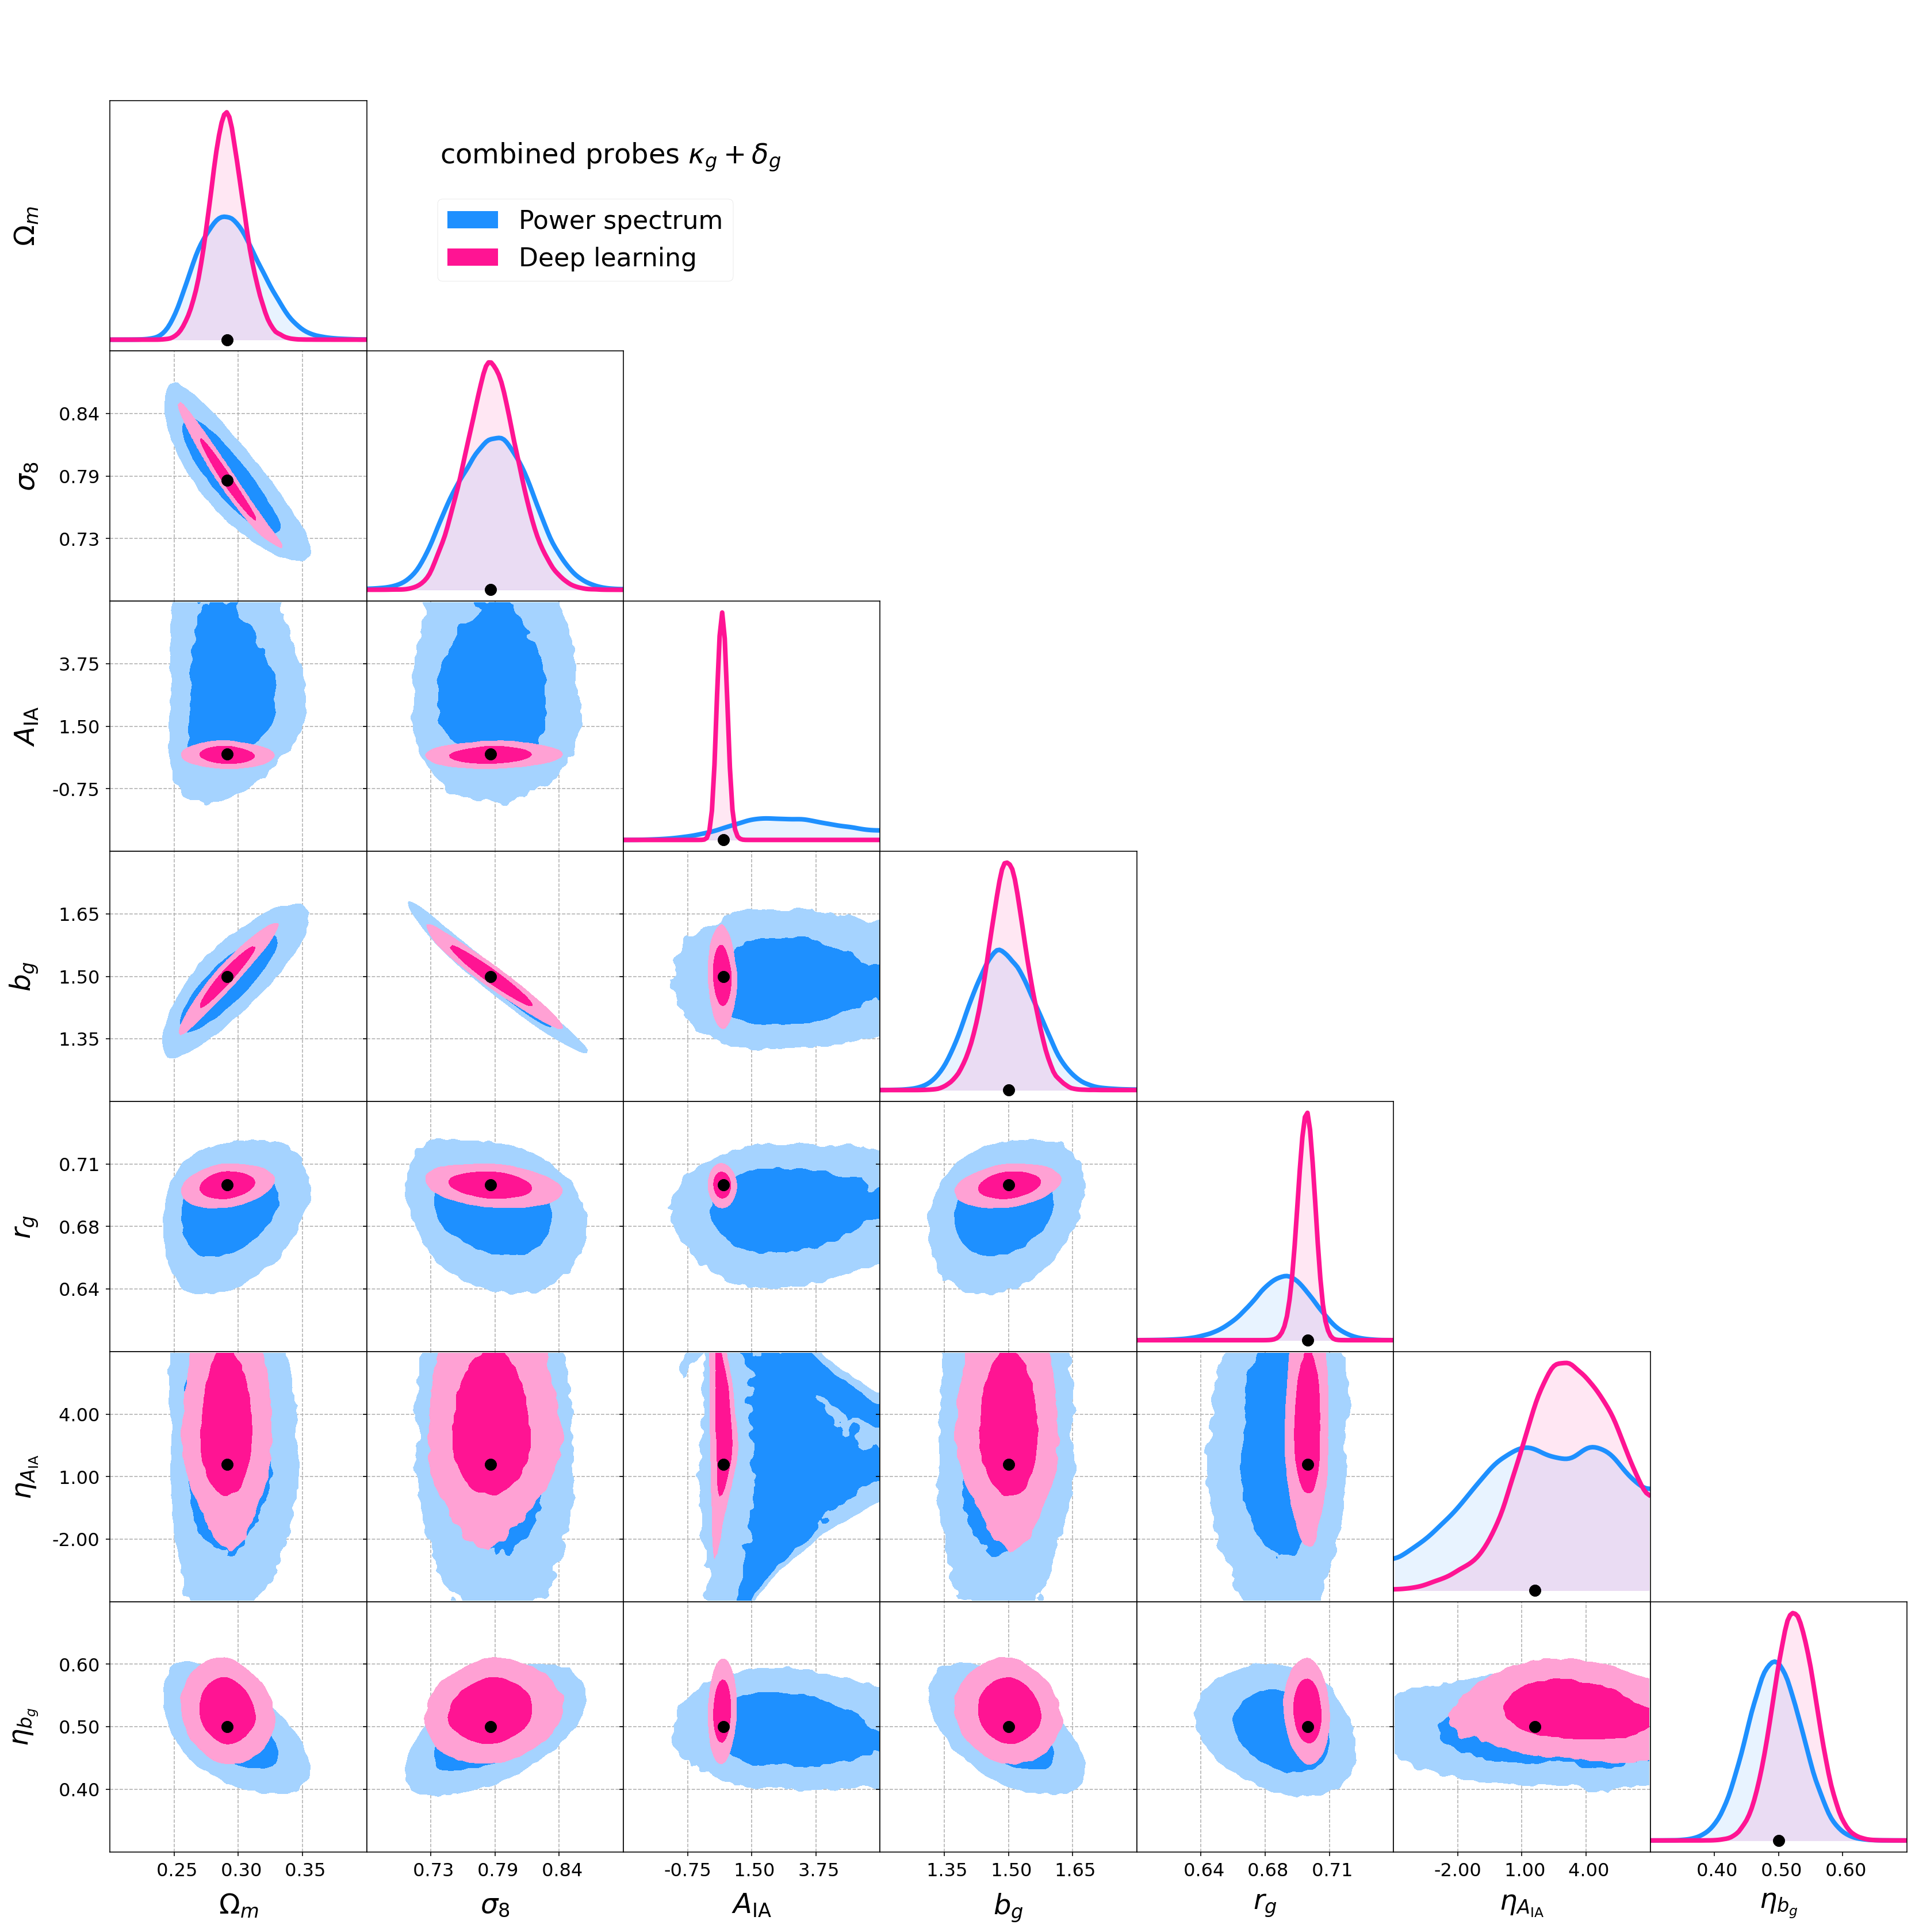

In [264]:
# id_sample=0,4
figs = utils_plots.plot_constraints_triangle(results_prefix, id_sample=0, probes=['cp'], algos=['psd', 'cnn']);
tags = ['comb']
for fig, tag in zip(figs,tags):
    fig.savefig(f'notebooks/figure_constraints_{tag}.pdf', bbox_inches=0)
for tag in tags:
    os.system(f'pdfcrop notebooks/figure_constraints_{tag}.pdf notebooks/figure_constraints_{tag}.pdf')
    

repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')
repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')
repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')
repos/trianglechain/trianglechain/TriangleChain.py:295: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axc.grid(grid, zorder=0, linestyle='--')


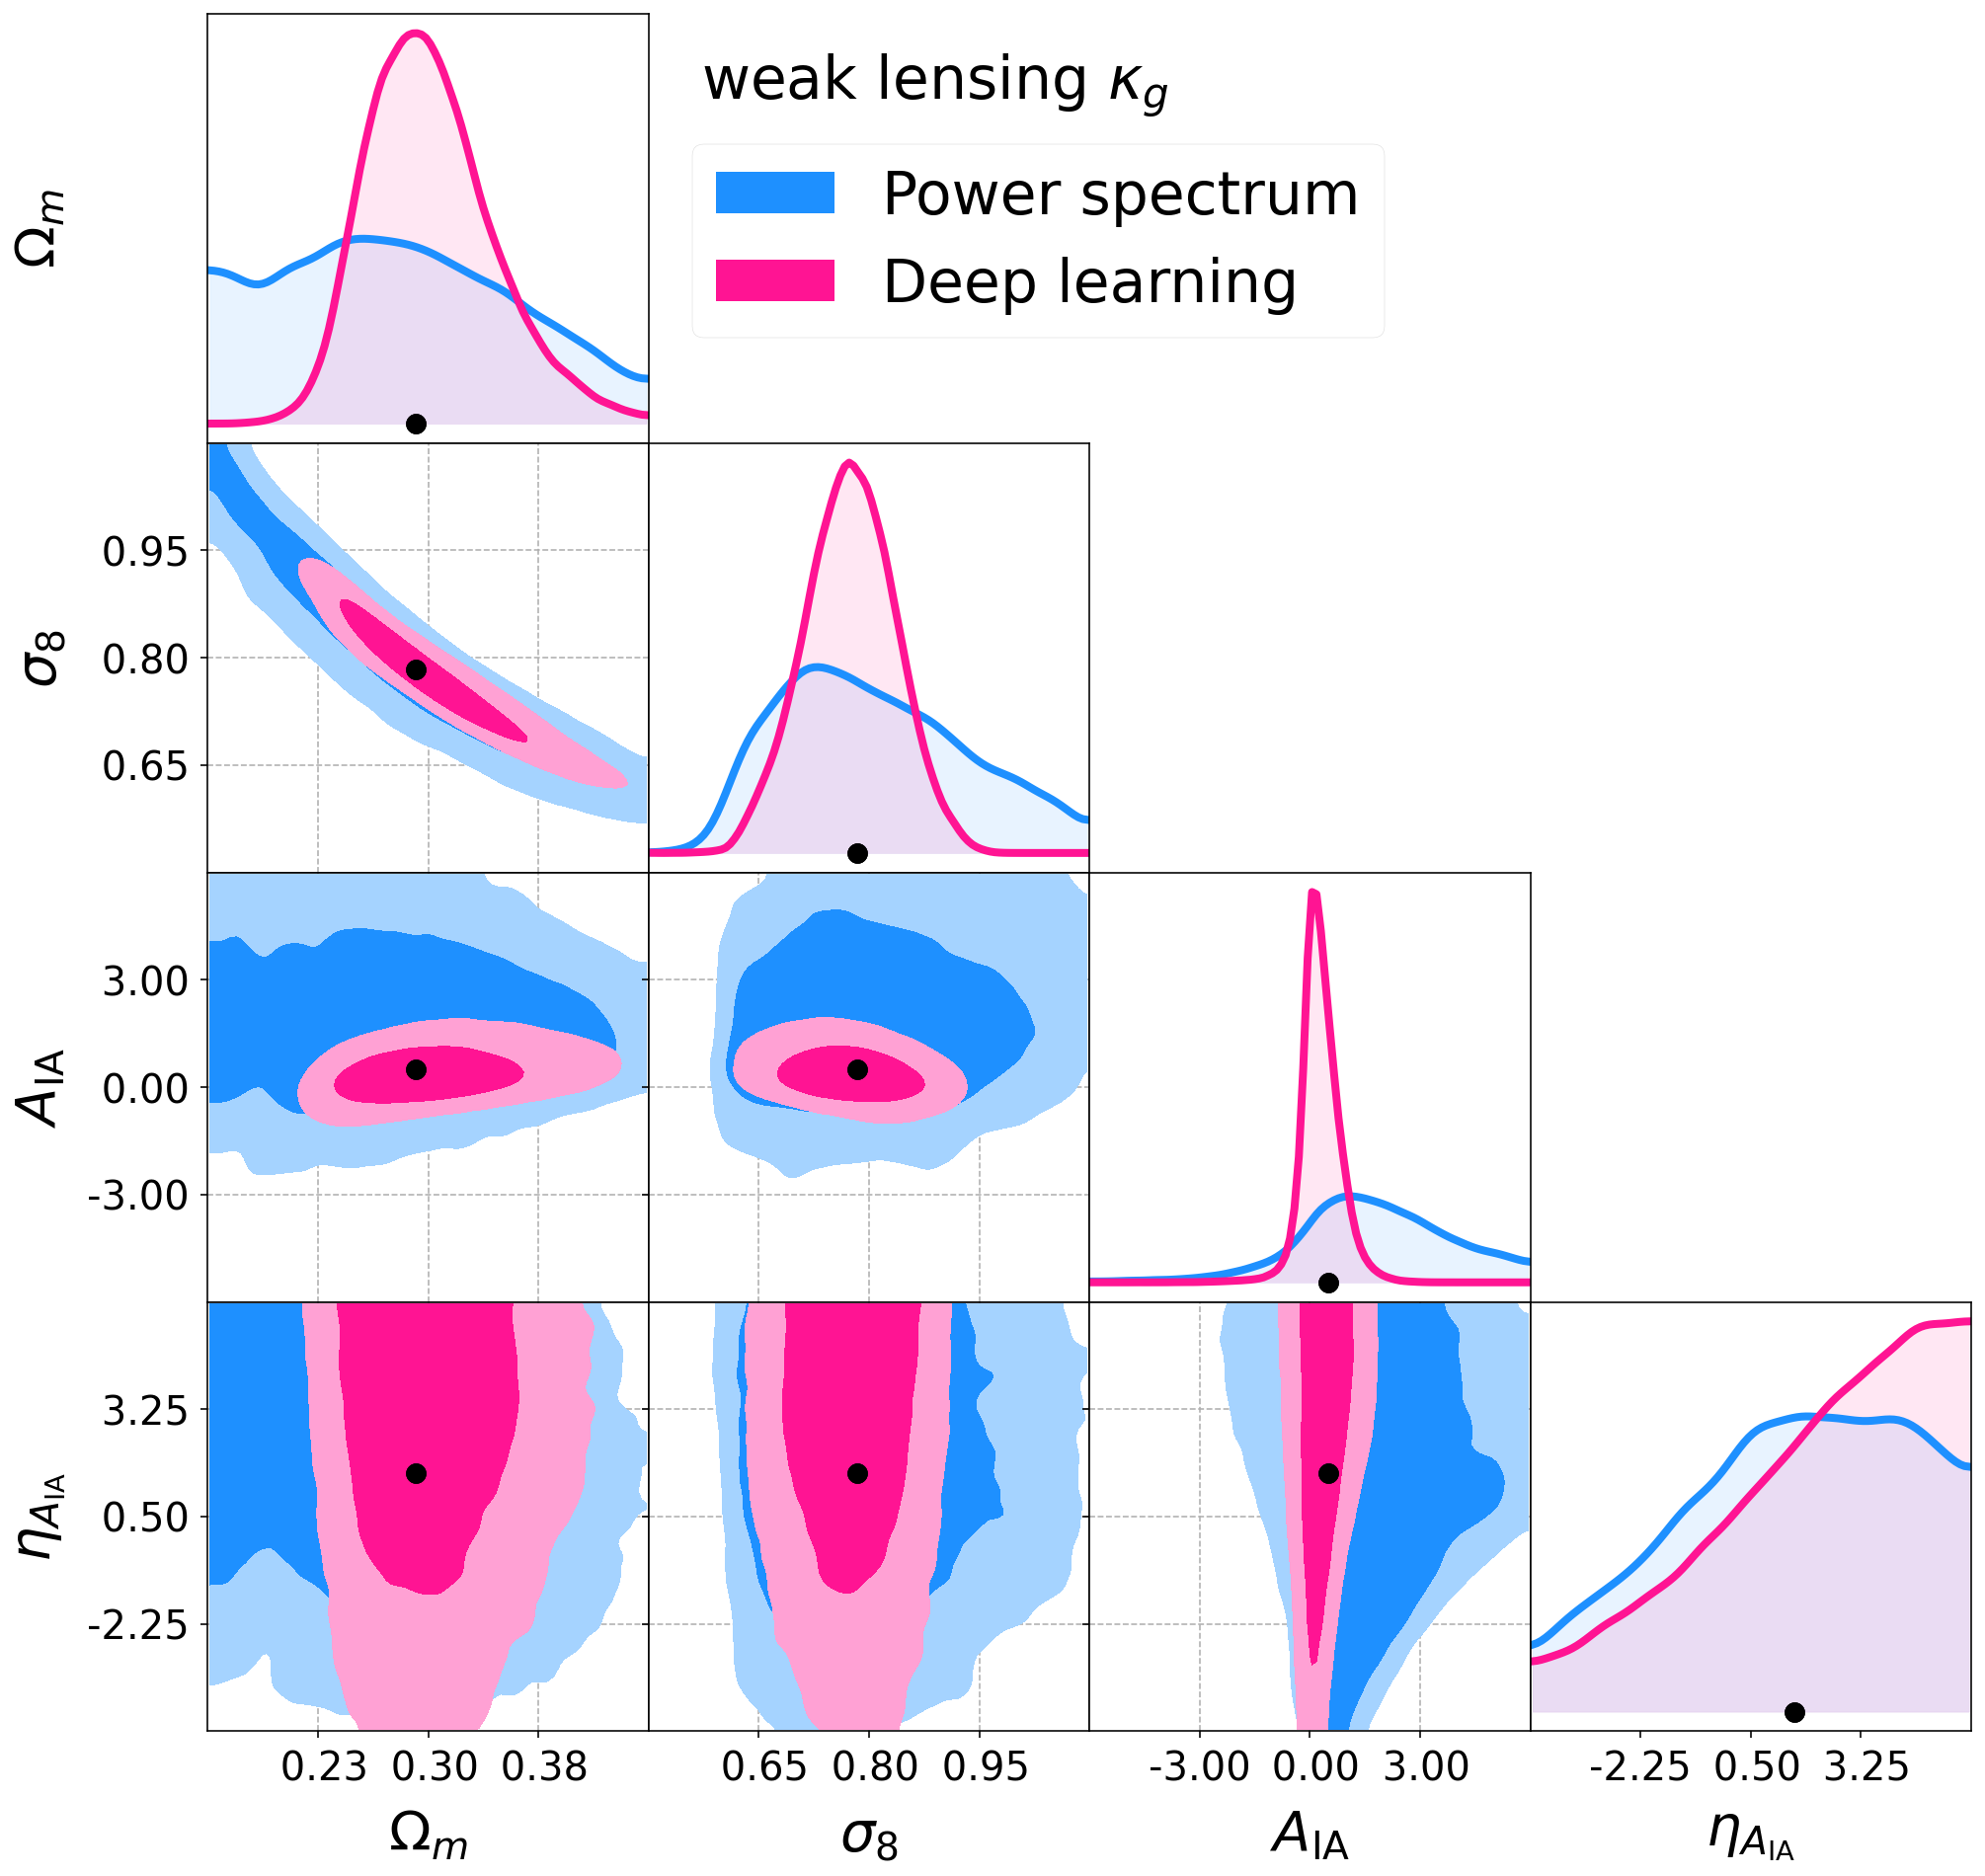

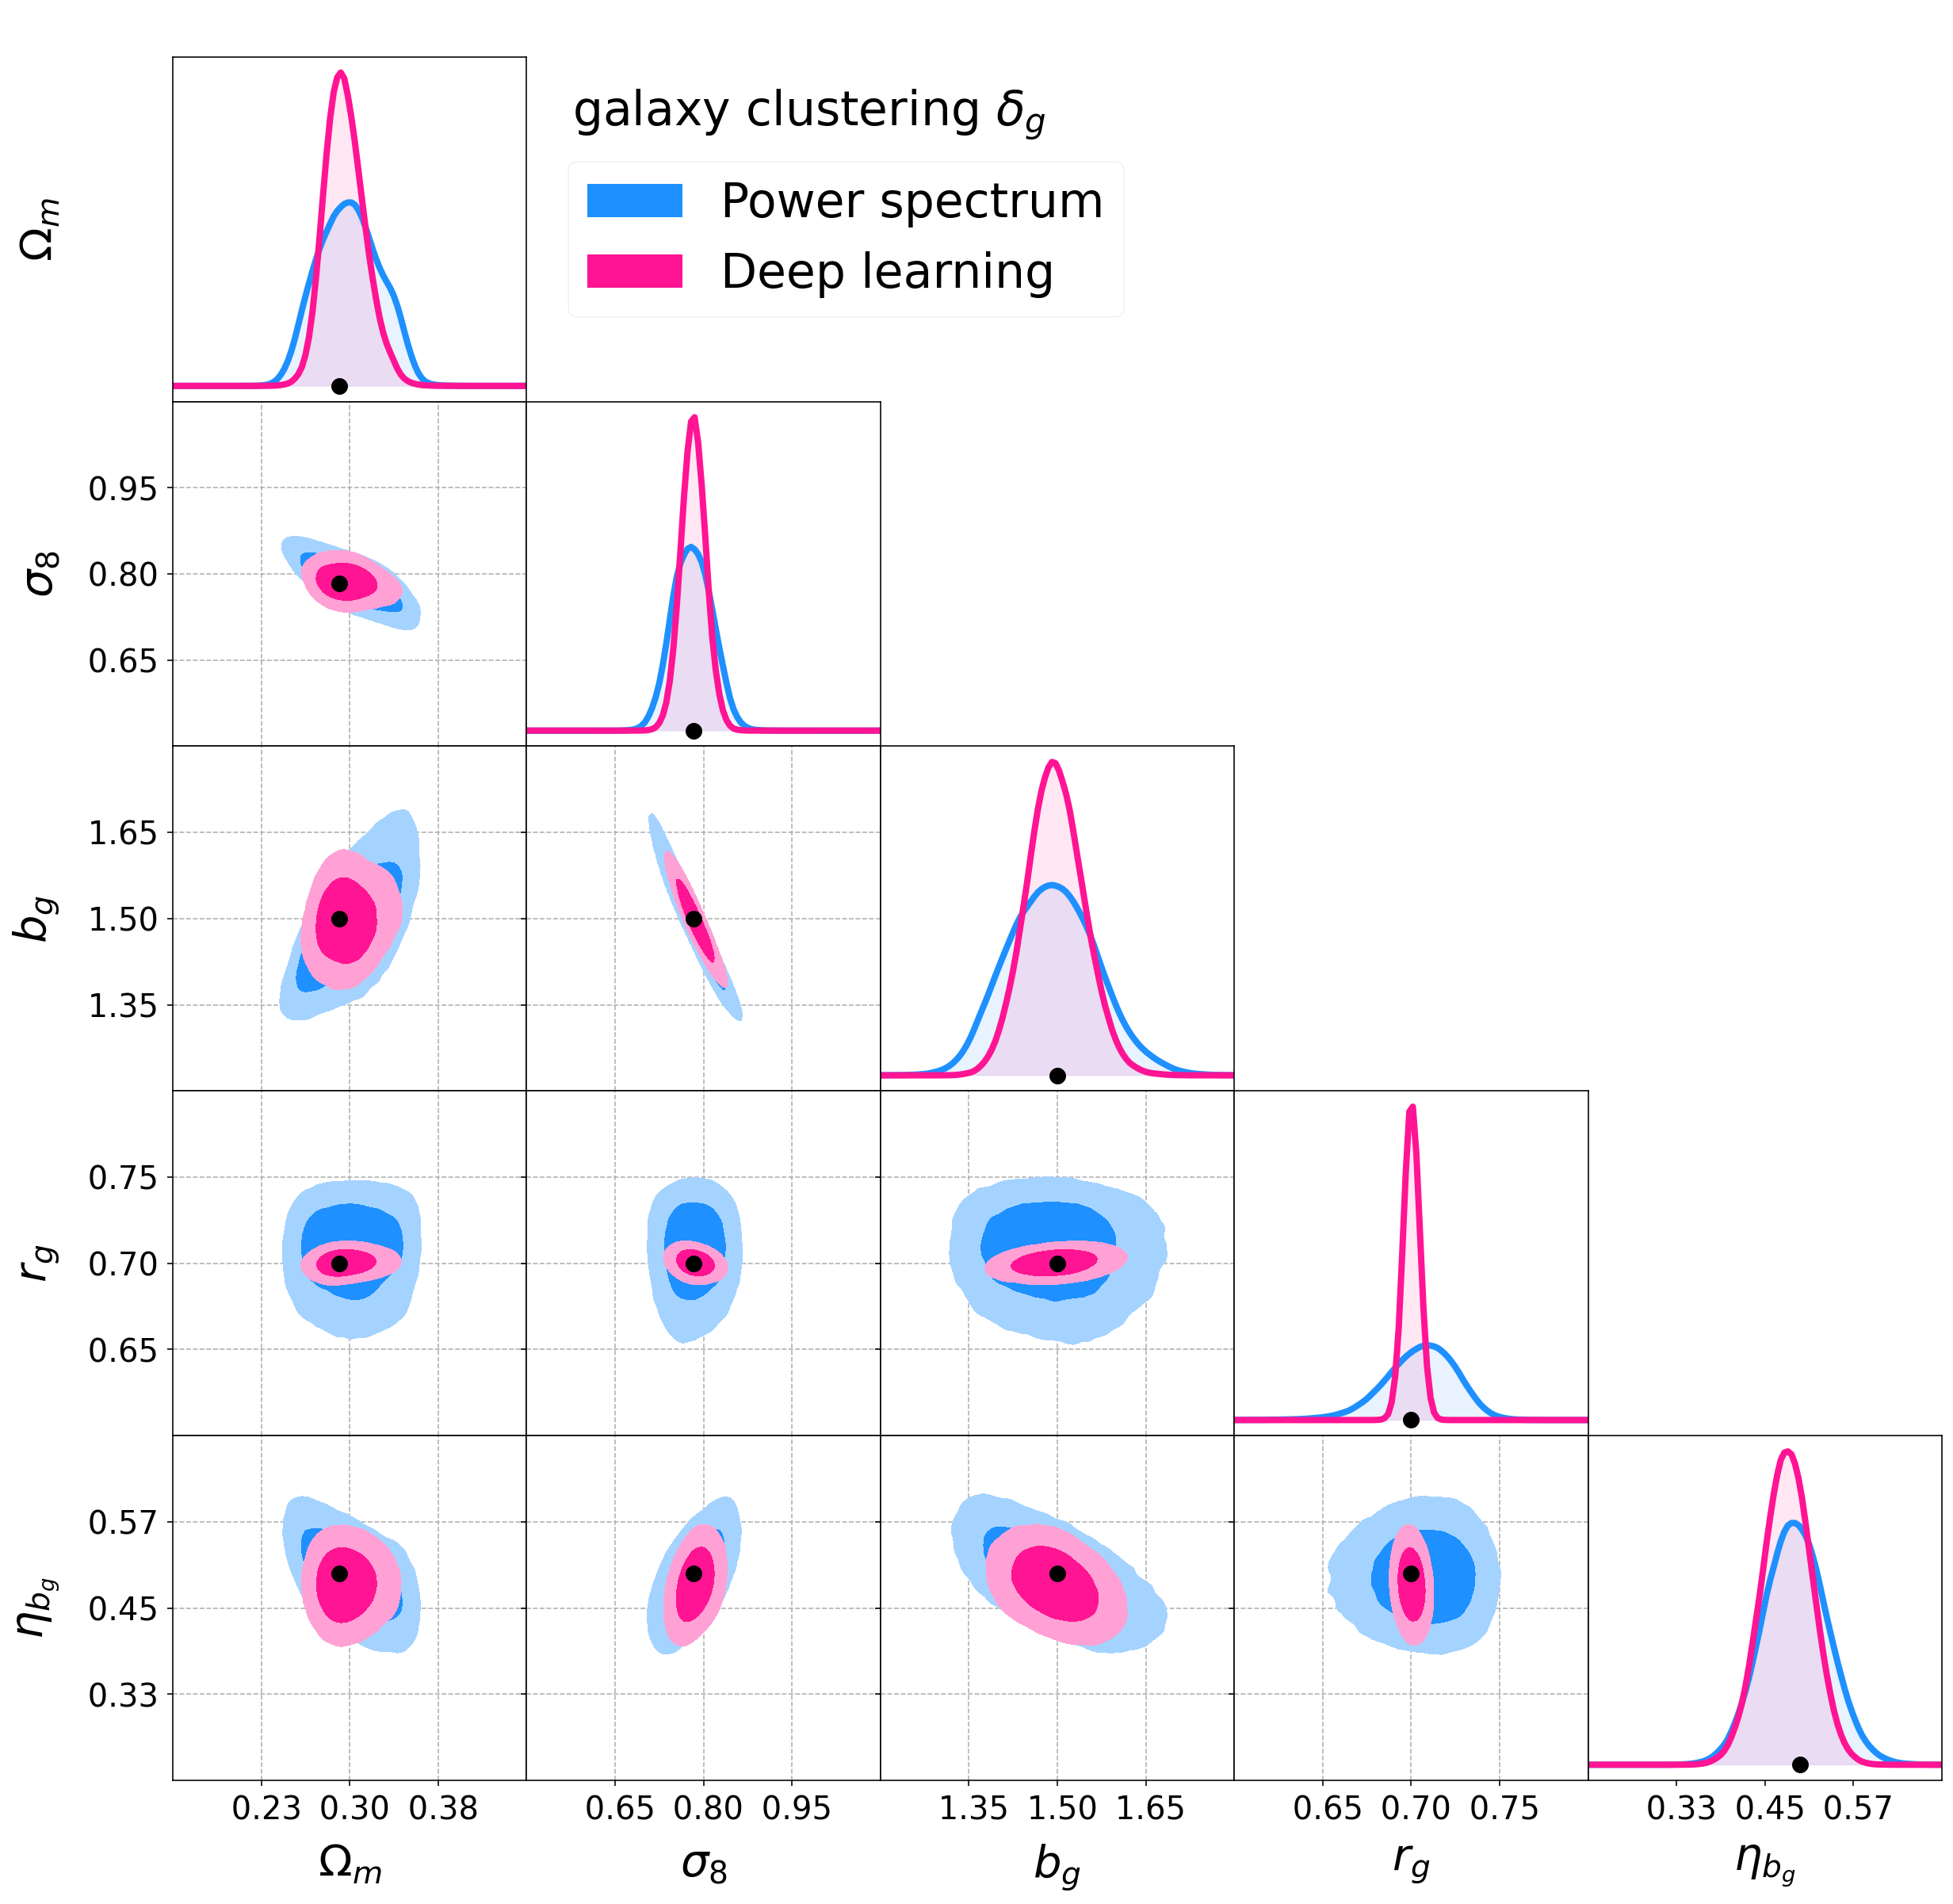

In [267]:
# id_sample=0,4
figs = utils_plots.plot_constraints_triangle(results_prefix, id_sample=0, probes=['kg', 'dg'], algos=['psd', 'cnn']);
tags = ['lens', 'clus']
for fig, tag in zip(figs,tags):
    fig.savefig(f'notebooks/figure_constraints_{tag}.pdf', bbox_inches=0)
for tag in tags:
    os.system(f'pdfcrop notebooks/figure_constraints_{tag}.pdf notebooks/figure_constraints_{tag}.pdf')
    

# plot S8 vs IA

In [197]:
np.linspace(0.6, 0.9, 6)

array([0.6 , 0.66, 0.72, 0.78, 0.84, 0.9 ])

0

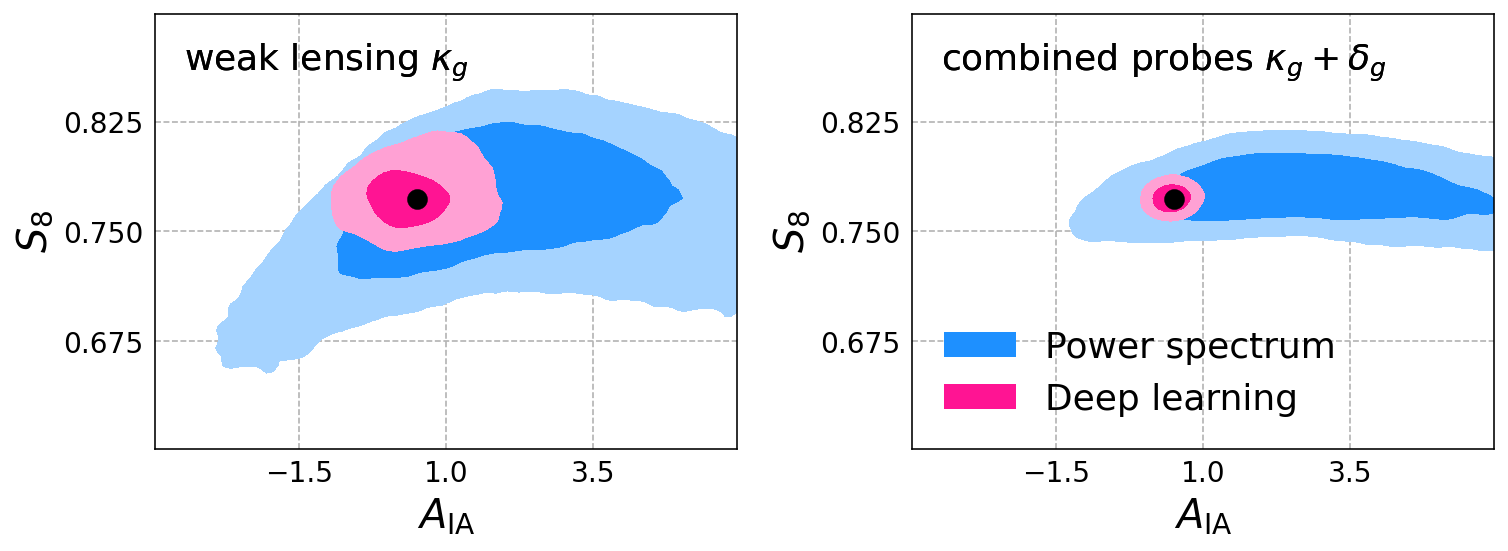

In [202]:
fig = utils_plots.plot_compare_IA_S8(results_prefix, id_sample=0)
fig.savefig('notebooks/figure_IA_S8.pdf', bbox_inches='tight')
os.system(f'pdfcrop notebooks/figure_IA_S8.pdf notebooks/figure_IA_S8.pdf')


# plot nonlin bias

0

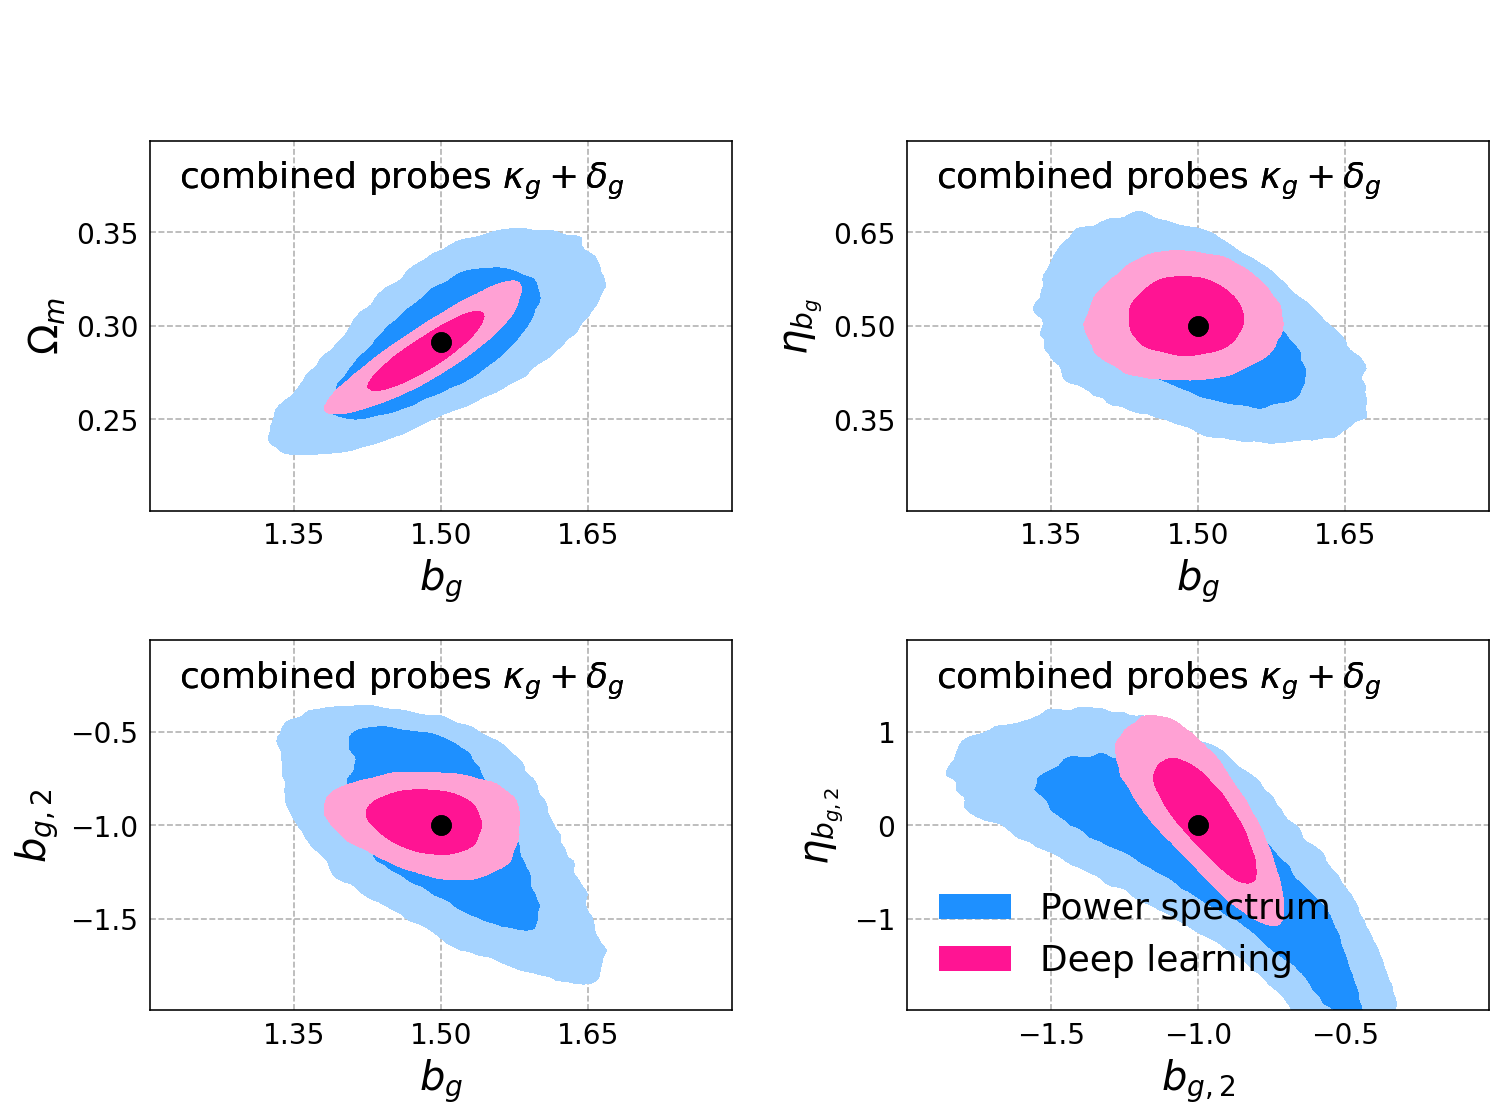

In [260]:
fig = utils_plots.plot_compare_nonlin_bias(results_prefix_nonlin, id_sample=0)
fig.savefig('notebooks/figure_nonlin_bias.pdf', bbox_inches='tight')
os.system(f'pdfcrop notebooks/figure_nonlin_bias.pdf notebooks/figure_nonlin_bias.pdf')


# table gain summary

In [263]:
tab = utils_plots.plot_gain_summary(results_prefix, results_prefix_nonlin, n_chains=200)
with open('notebooks/gain_table.tex', 'w') as f:
    f.write(tab)


# plot sensitivity

In [253]:
results_prefix = '../056_npix64/sensitivity/'

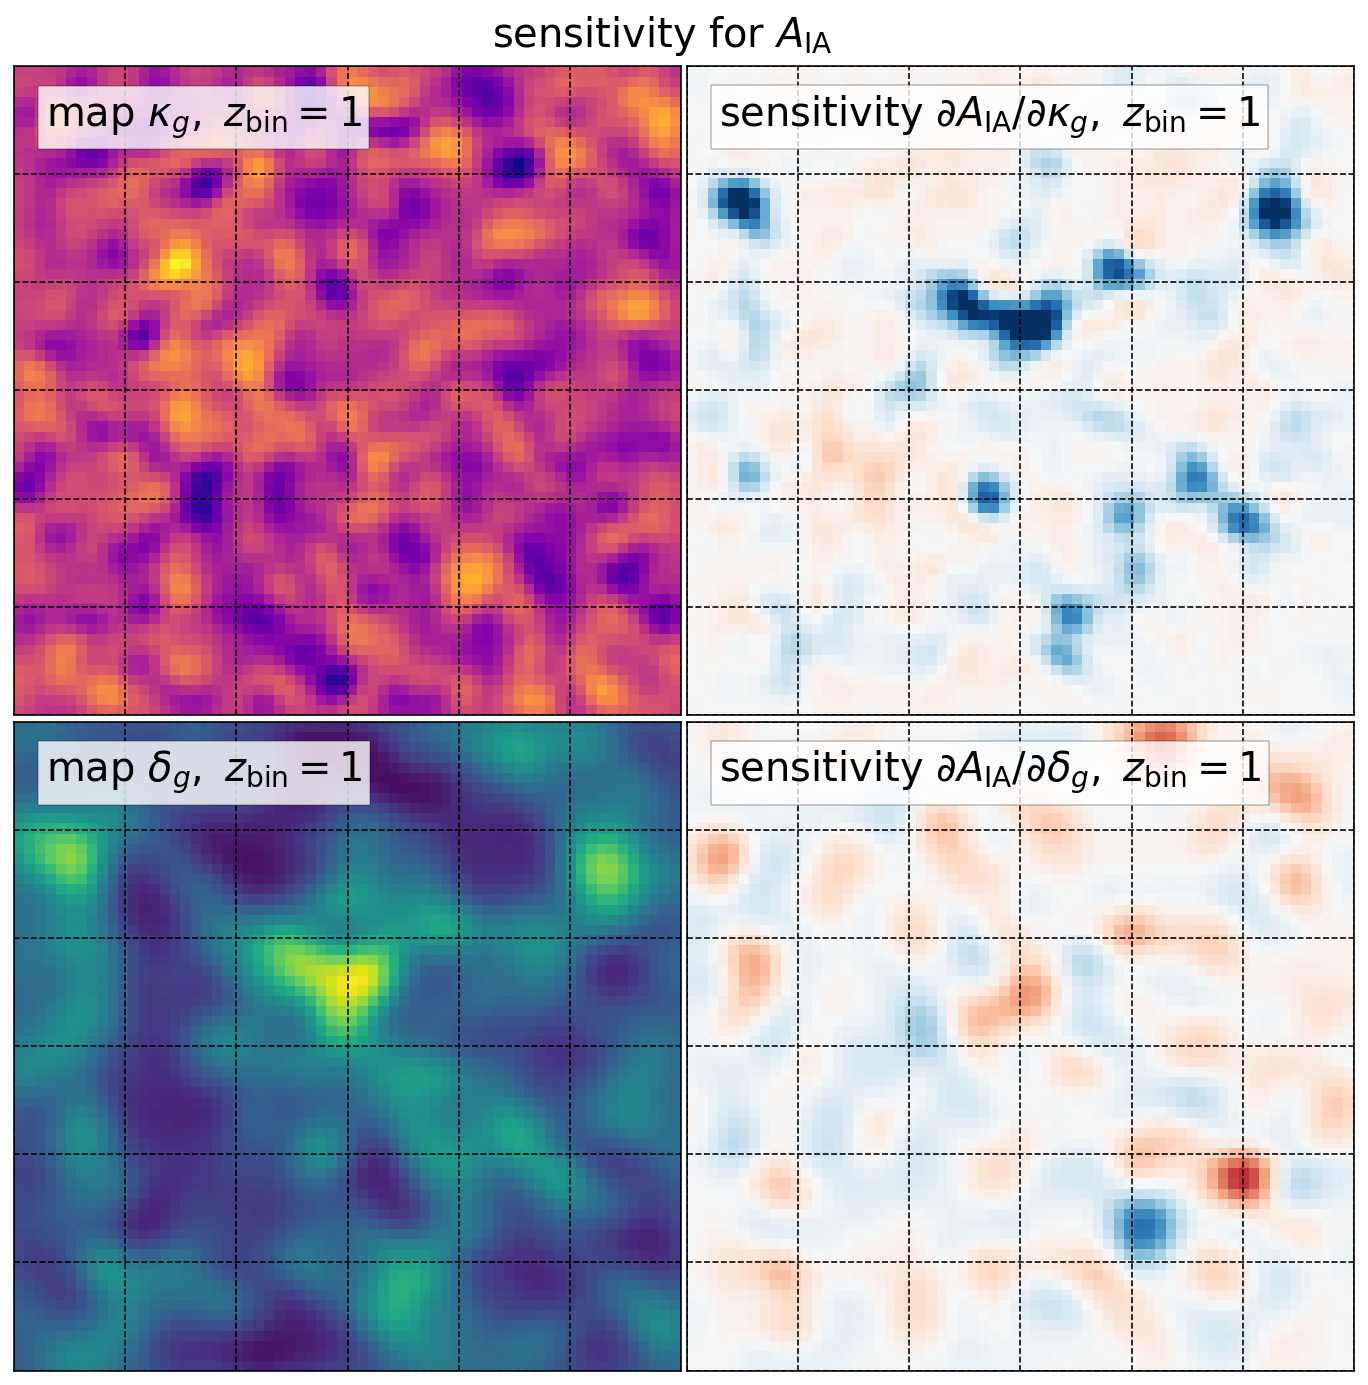

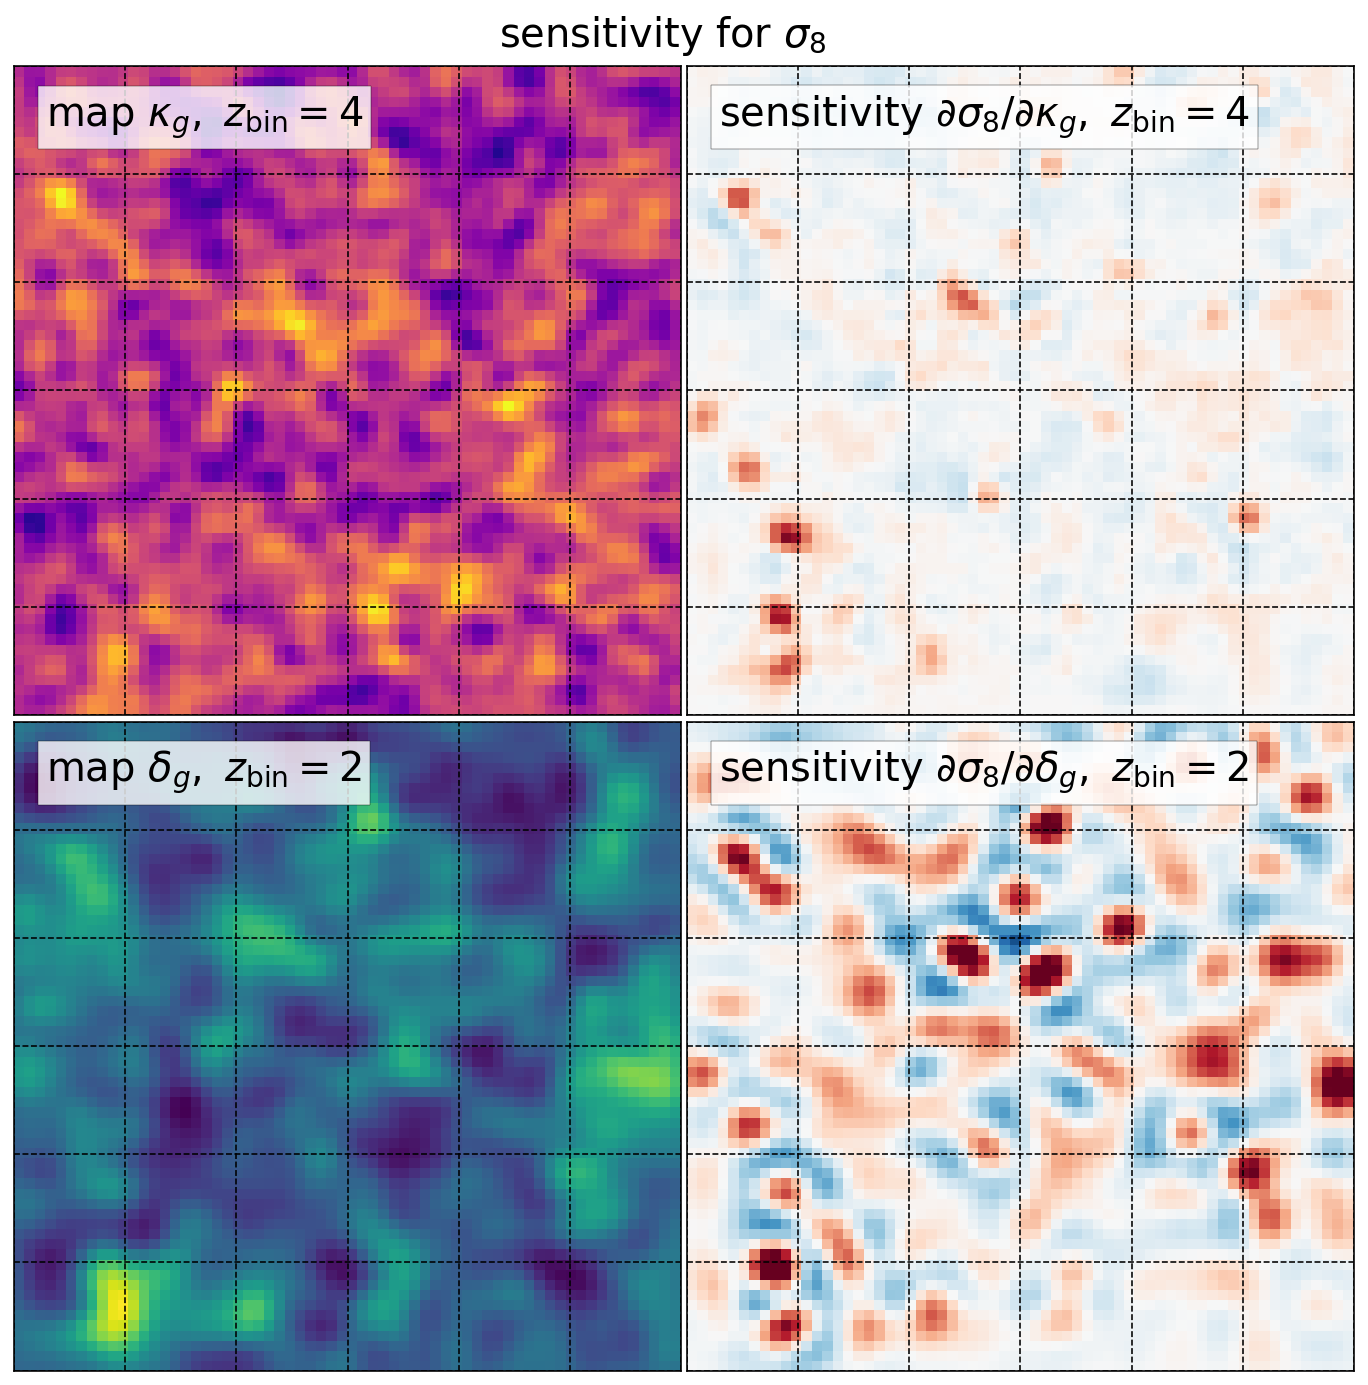

In [259]:
figs = utils_plots.plot_sensitivity(results_prefix, id_survey=0, id_field=0, index=0)
tags = ['0', '1']
for fig, tag in zip(figs,tags):
    fig.savefig(f'notebooks/figure_sensitivity_{tag}.pdf', bbox_inches=0)
for tag in tags:
    os.system(f'pdfcrop notebooks/figure_sensitivity_{tag}.pdf notebooks/figure_sensitivity_{tag}.pdf')

# plot reshift bins

$z_{\rm{bin}}$=1 $\langle z \rangle$=0.31
$z_{\rm{bin}}$=2 $\langle z \rangle$=0.48
$z_{\rm{bin}}$=3 $\langle z \rangle$=0.75
$z_{\rm{bin}}$=4 $\langle z \rangle$=0.94


0

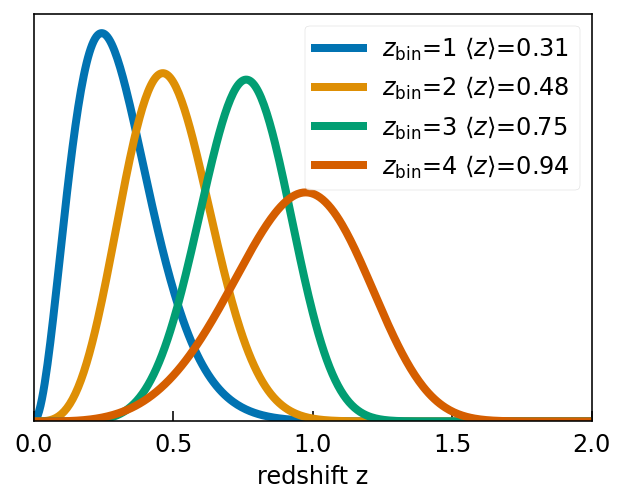

In [200]:
fig = utils_plots.plot_reshift_bins(path_nzs='../redshift_distributions')
fig.savefig(f'notebooks/figure_nz.pdf', bbox_inches=0)
os.system(f'pdfcrop notebooks/figure_nz.pdf notebooks/figure_nz.pdf')

# plot stochasticity relation

0

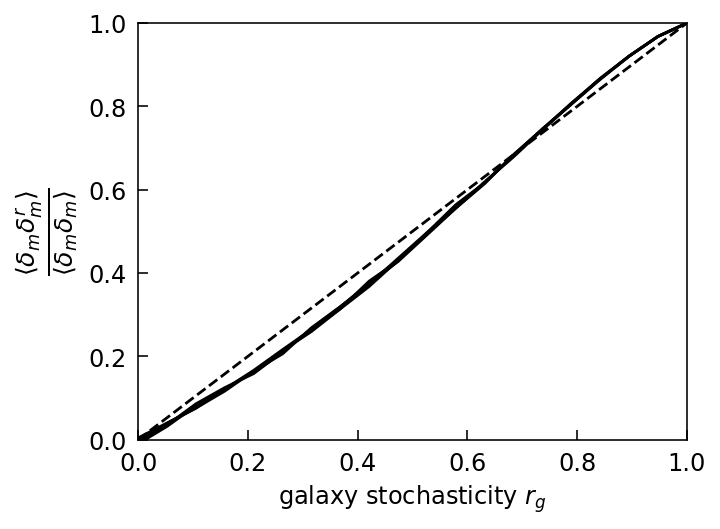

In [160]:
fig = utils_plots.plot_stochasticity_relation(path='./cosmo_0.291_0.783_0/kappa_maps.h5');
fig.savefig(f'notebooks/figure_stochasticity.pdf')
os.system(f'pdfcrop notebooks/figure_stochasticity.pdf notebooks/figure_stochasticity.pdf')

# plot likelihood model check

In [ ]:
!rsync -avhR {host}:{path}/./snapshots/results*/*/predictions/predictions__likenet_verif*.h5 .


In [110]:
results_prefix = 'snapshots/results_2203151400/stage3linear/'

base_cp_cnn selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.19 0.20
stdv snapshots/results_2203151400/stage3linear/ -0.07 0.11
base_cp_psd selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.19 0.18
stdv snapshots/results_2203151400/stage3linear/ -0.09 0.14
base_dg_cnn selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.14 0.14
stdv snapshots/results_2203151400/stage3linear/ -0.06 0.09
base_dg_psd selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.15 0.15
stdv snapshots/results_2203151400/stage3linear/ -0.08 0.12
base_kg_cnn selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.15 0.16
stdv snapshots/results_2203151400/stage3linear/ -0.07 0.08
base_kg_psd selected in prior 1279800 1870400
mean snapshots/results_2203151400/stage3linear/ -0.21 0.26
stdv snapshots/results_2203151400/stage3linear/ -0.08 0.32
all -0.17 0.17
a

0

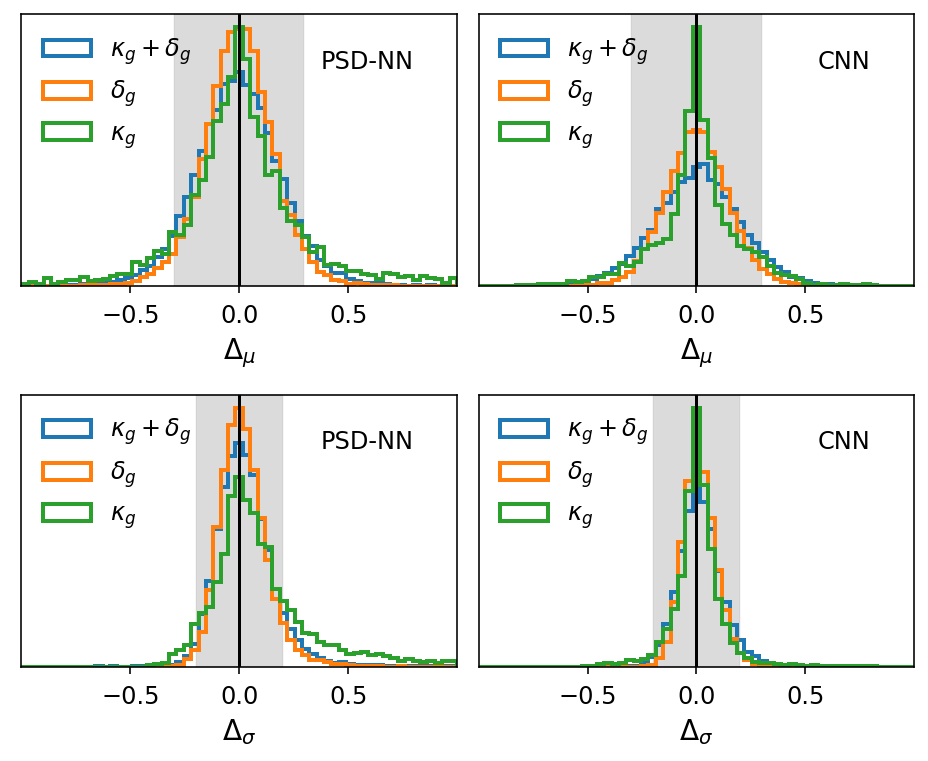

In [111]:
fig = utils_plots.plot_likemodel_check(path=results_prefix);
fig.savefig(f'notebooks/figure_likemodel_check.pdf')
os.system(f'pdfcrop notebooks/figure_likemodel_check.pdf notebooks/figure_likemodel_check.pdf')


# plot PSD model check

./lssnet_logs_csv/lssnet_logs_case2*.csv ['./lssnet_logs_csv/lssnet_logs_case2_separable_med.csv']
./lssnet_logs_csv/lssnet_logs_case3*.csv ['./lssnet_logs_csv/lssnet_logs_case3_local_med.csv']
./lssnet_logs_csv/lssnet_logs_case4*.csv ['./lssnet_logs_csv/lssnet_logs_case4_classic_xl.csv']
./lssnet_logs_csv/lssnet_logs_case5*.csv ['./lssnet_logs_csv/lssnet_logs_case5_separable_xl.csv']
./lssnet_logs_csv/lssnet_logs_case6*.csv ['./lssnet_logs_csv/lssnet_logs_case6_local_xl.csv']
./lssnet_logs_csv/lssnet_logs_base_cp_cnn.csv ['./lssnet_logs_csv/lssnet_logs_base_cp_cnn.csv']
./lssnet_logs_csv/lssnet_logs_base_cp_psd.csv ['./lssnet_logs_csv/lssnet_logs_base_cp_psd.csv']


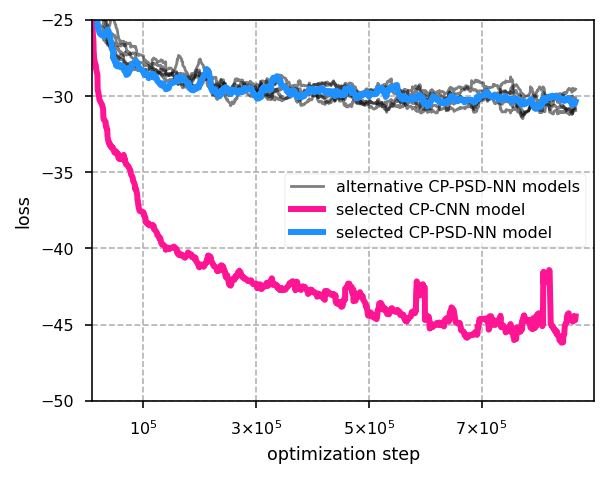

In [108]:
fig = utils_plots.plot_psd_opt(path='lssnet_logs_csv');
fig.savefig(f'notebooks/figure_psdopt.pdf')


# bias evolution power law from DES Y3

In [420]:
utils_plots.measure_bias_error_from_desy3()

linear bias b_g 0.06
linear bias eta_b_g 0.21
non-linear bias b2_g 0.09
non-linear bias eta_b2_g 11.11
